In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the dataset
train = pd.read_csv('./data/song_data.csv')

In [4]:
train.shape

(18835, 15)

In [5]:
train.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
train.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18830,Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,0.015700,3,0.119,-12.020,1,0.0328,106.063,4,0.323
18834,Up to Me,60,193533,0.911,0.640,0.381,0.000254,4,0.104,-11.790,1,0.0302,91.490,4,0.581


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


count    18835.000000
mean        52.991877
std         21.905654
min          0.000000
25%         40.000000
50%         56.000000
75%         69.000000
max        100.000000
Name: song_popularity, dtype: float64


Text(0, 0.5, 'Density')

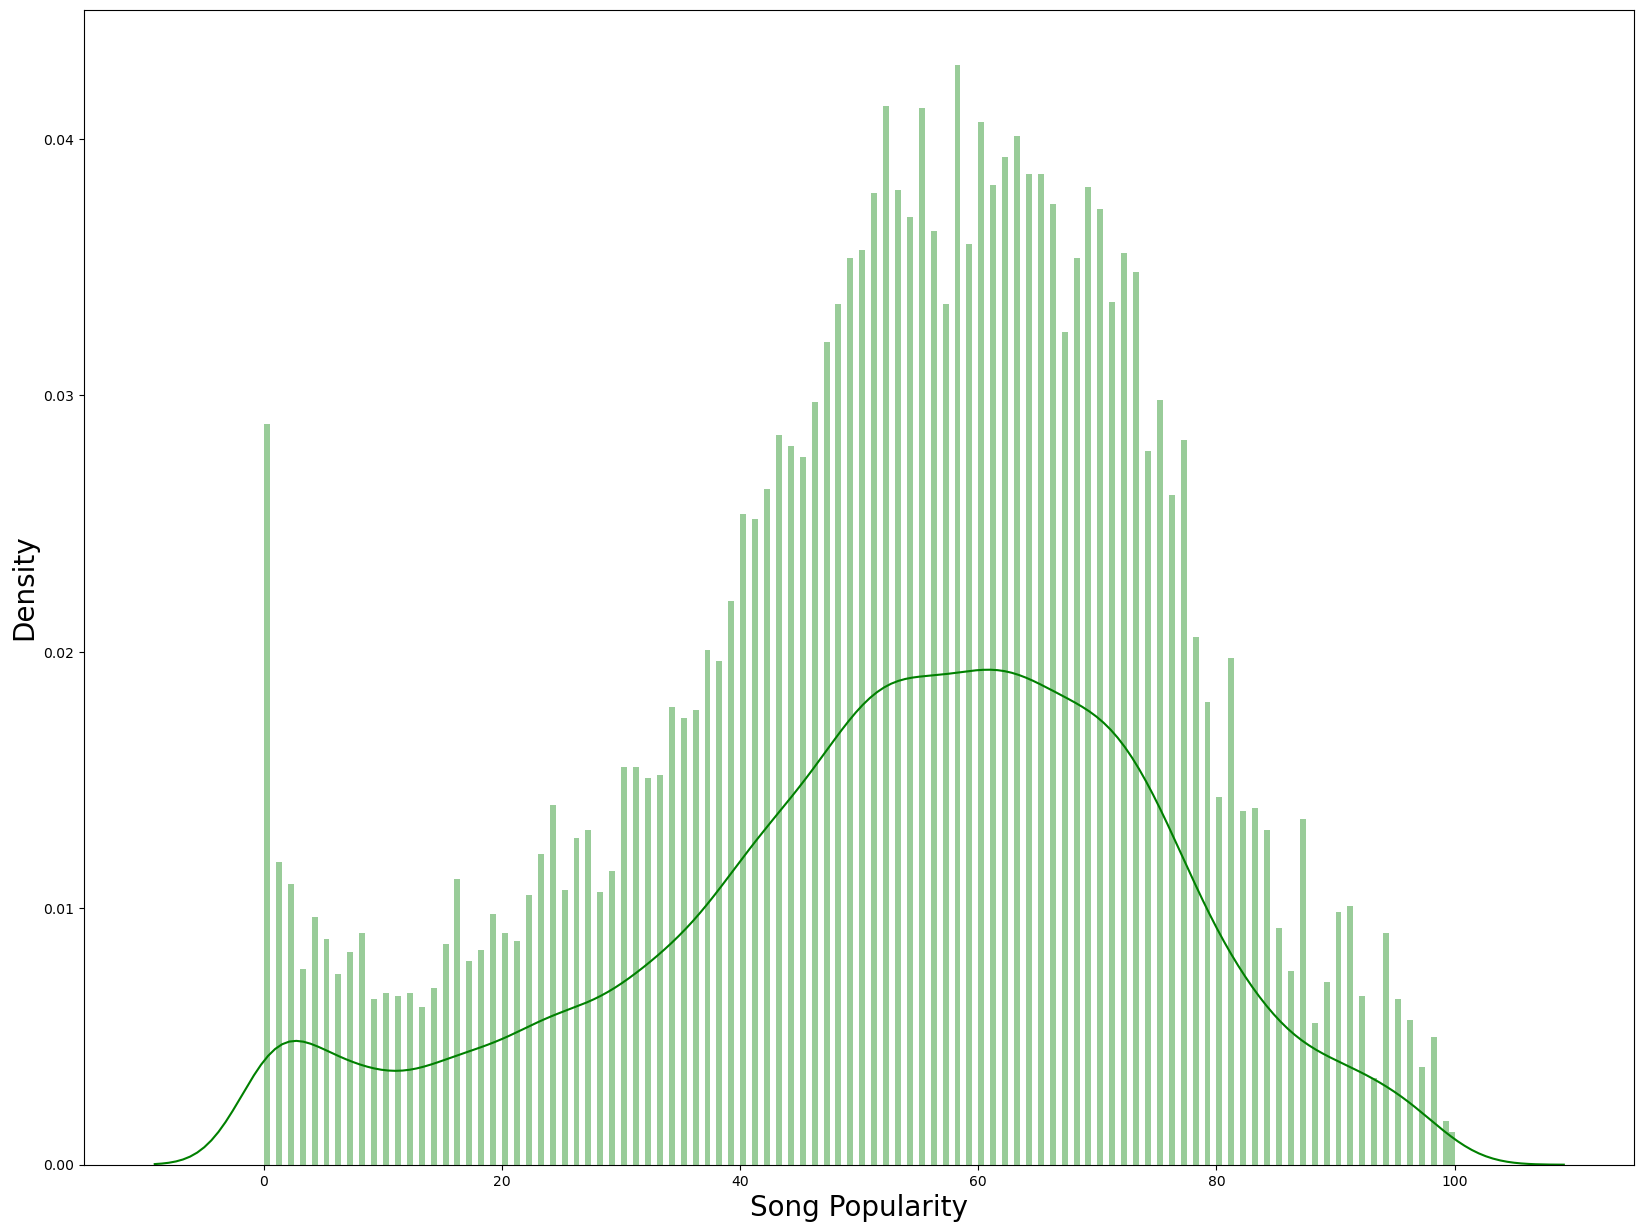

In [31]:
print(train['song_popularity'].describe())
fig, ax = plt.subplots(figsize=(20, 15))
sns.distplot(train['song_popularity'], color='g', bins=200, hist_kws={'alpha': 0.4}, ax=ax);
ax.set_xlabel('Song Popularity', fontsize=20)
ax.set_ylabel('Density', fontsize=20)

In [20]:
df_num = train.select_dtypes(include = ['float64', 'int64','object'])
df_num.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,00s Rock Anthems


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >]],
      dtype=object)

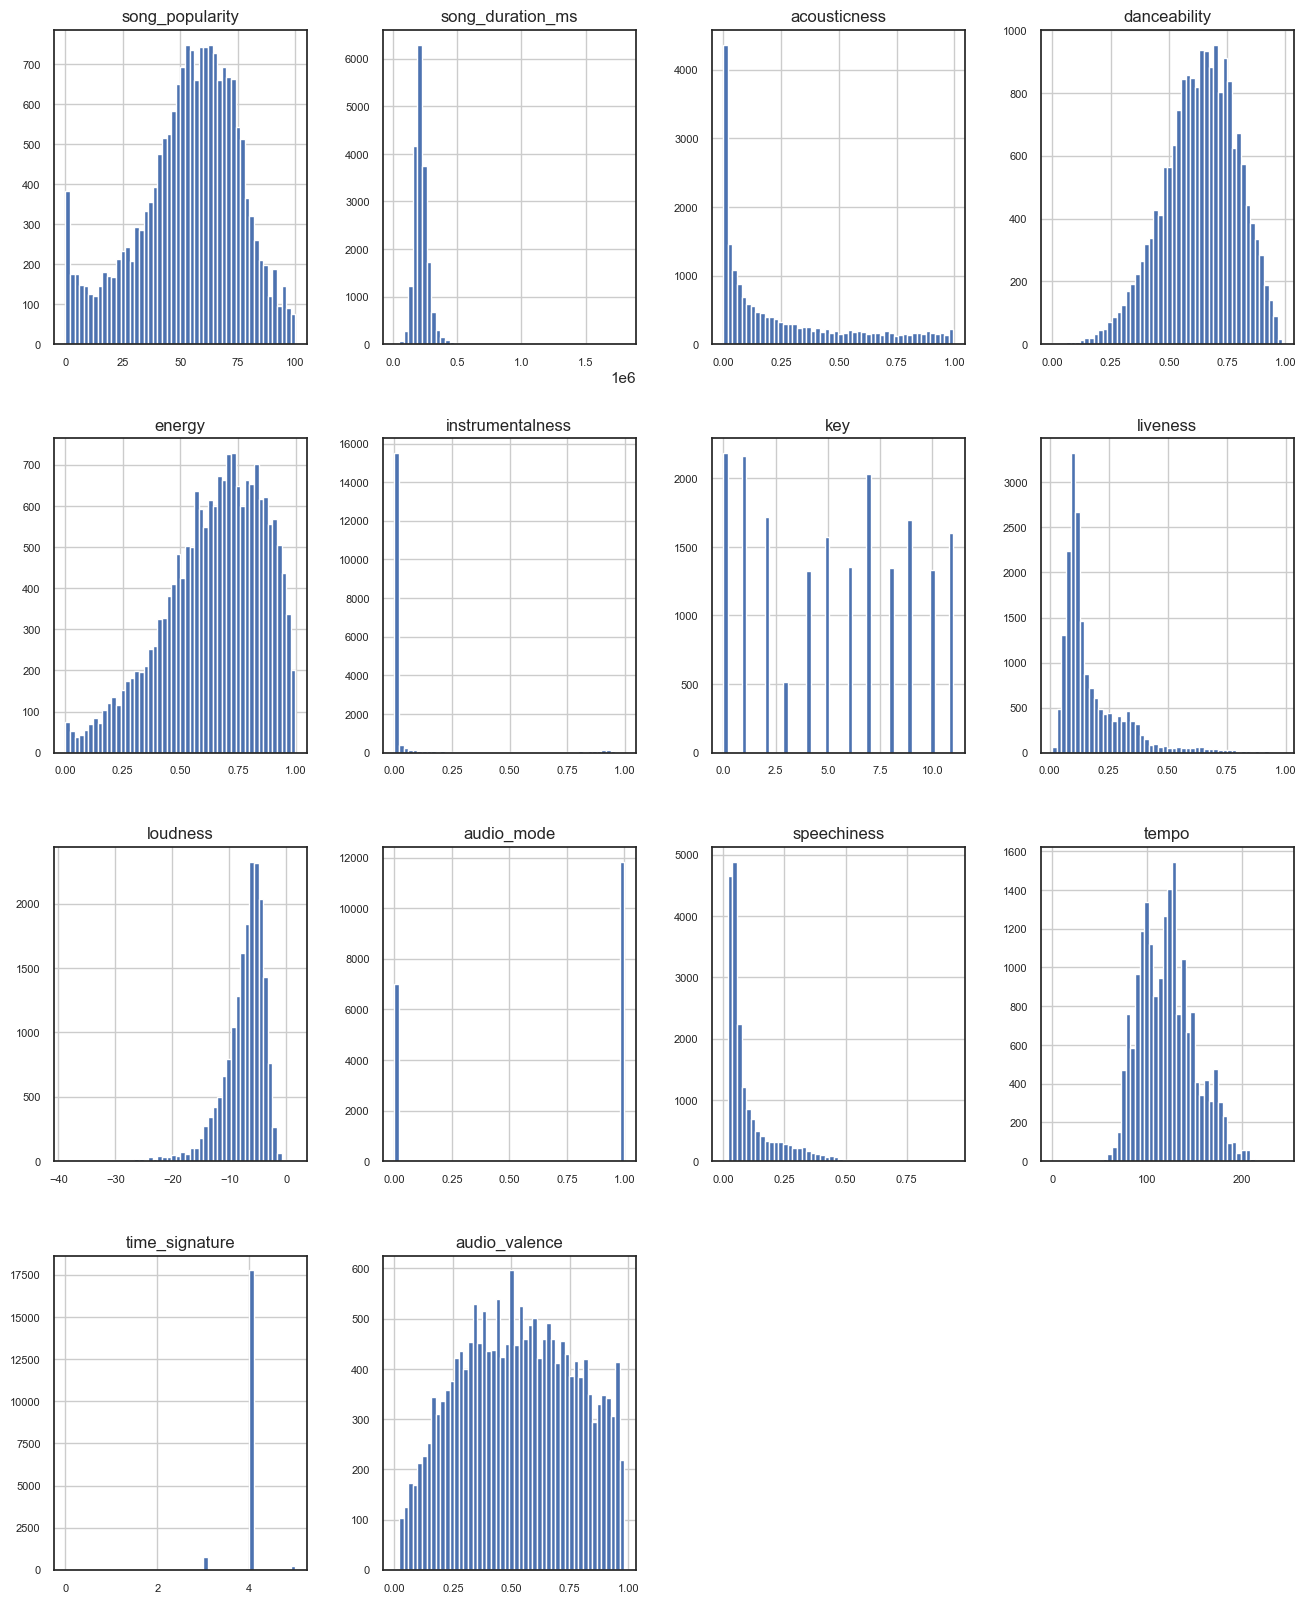

In [21]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

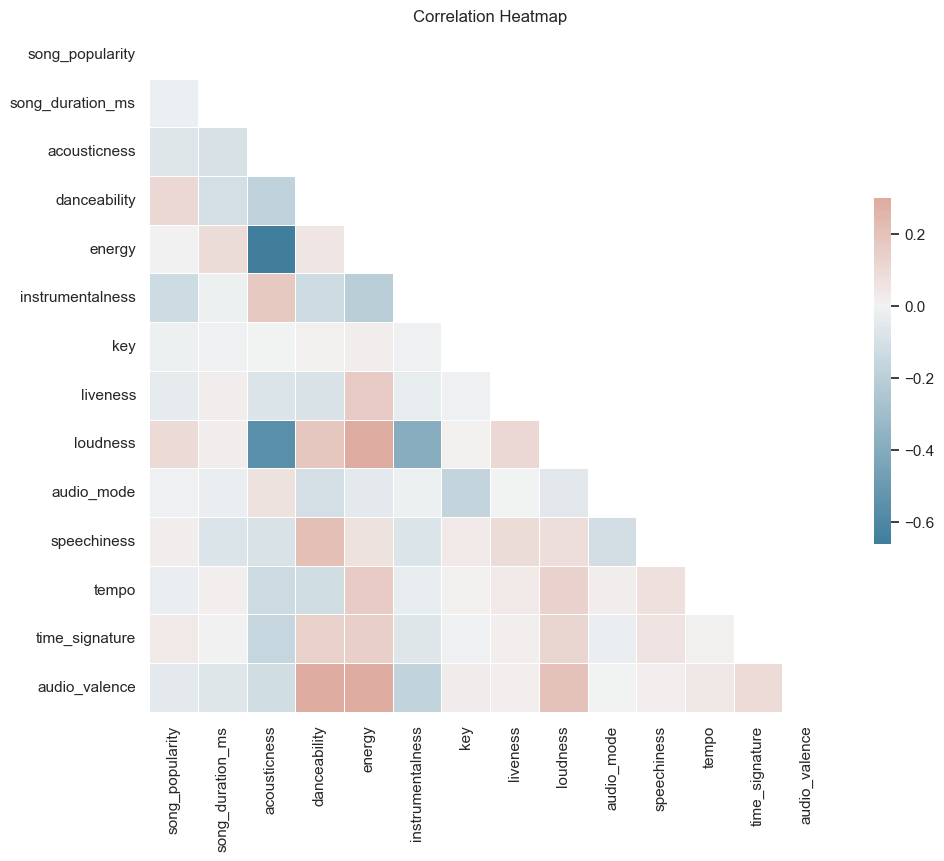

In [12]:
# calculate the correlation matrix
corr = df_num.corr()

# plot the correlation heatmap
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

In [24]:
quantitative_features_list = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence','song_popularity']
df_quantitative_values = train[quantitative_features_list]
df_quantitative_values.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence,song_popularity
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,0.0294,167.060,0.474,73
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0498,105.256,0.370,66
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,0.0792,123.881,0.324,76
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,0.1070,122.444,0.198,74
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,0.0313,172.011,0.574,56


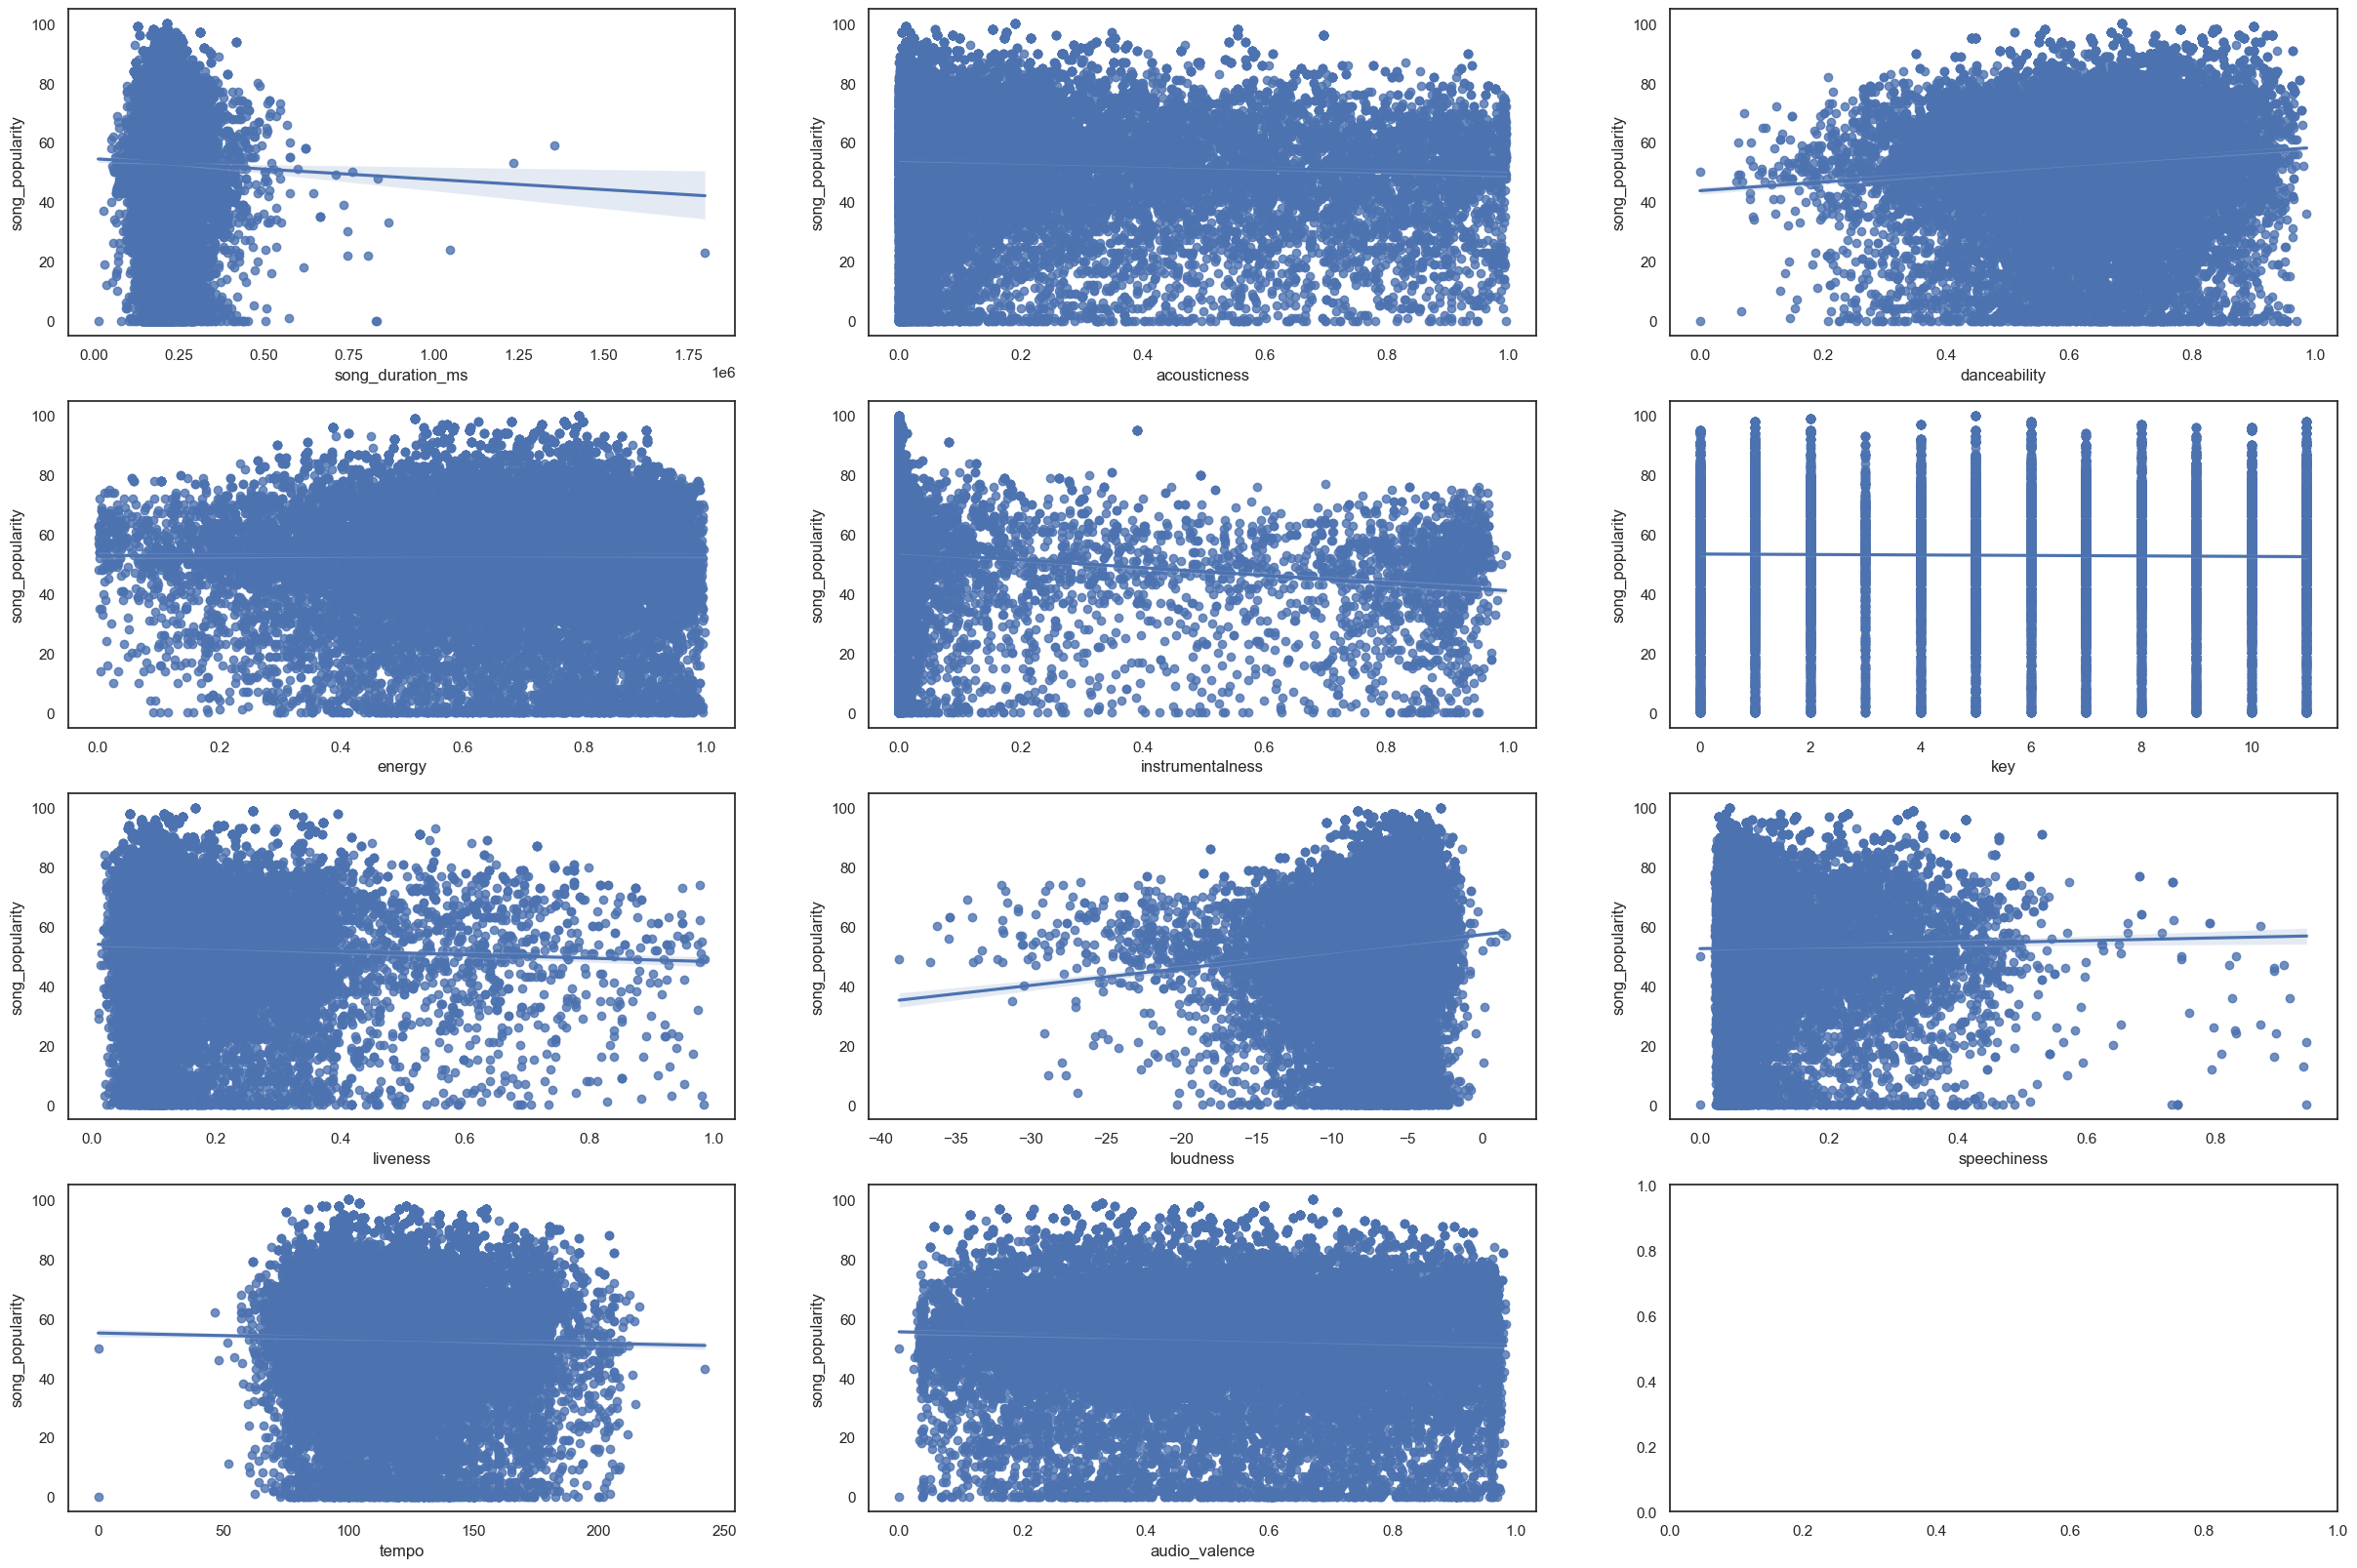

In [30]:
fig, ax = plt.subplots(round(len(quantitative_features_list) / 3), 3, figsize = (30, 20))

for i, ax in enumerate(fig.axes):
    if i < len(quantitative_features_list) - 1:
        sns.regplot(x=quantitative_features_list[i],y='song_popularity', data=train[quantitative_features_list], ax=ax)

In [37]:
# loop through each column
for col in train.columns:
    # check if column is categorical
    if train[col].dtype == 'object':
        # create a label encoder object and fit on the column
        le = LabelEncoder()
        le.fit(train[col].astype(str))
        # transform the column with the label encoder
        train[col] = le.transform(train[col].astype(str))

In [38]:
X = train.drop('song_popularity', axis=1)
y = train['song_popularity']

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Fit the models and make predictions on the training data
lasso = Lasso(alpha=0.0005, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_train)

enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42)
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_train)

krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
krr.fit(X_train, y_train)
y_pred_krr = krr.predict(X_train)

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_train)

In [41]:
# Calculate the mean absolute error (MAE) and root mean squared error (RMSE) on the training data
mae = [mean_absolute_error(y_train, y_pred_lasso), mean_absolute_error(y_train, y_pred_enet),
       mean_absolute_error(y_train, y_pred_krr), mean_absolute_error(y_train, y_pred_gbr)]
rmse = [np.sqrt(mean_squared_error(y_train, y_pred_lasso)), np.sqrt(mean_squared_error(y_train, y_pred_enet)),
        np.sqrt(mean_squared_error(y_train, y_pred_krr)), np.sqrt(mean_squared_error(y_train, y_pred_gbr))]

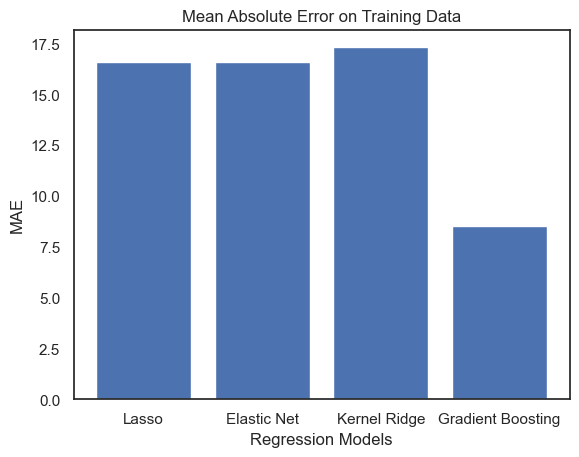

In [43]:
# Plot the results
models = ['Lasso', 'Elastic Net', 'Kernel Ridge', 'Gradient Boosting']
plt.bar(models, mae)
plt.title('Mean Absolute Error on Training Data')
plt.xlabel('Regression Models')
plt.ylabel('MAE')
plt.show()

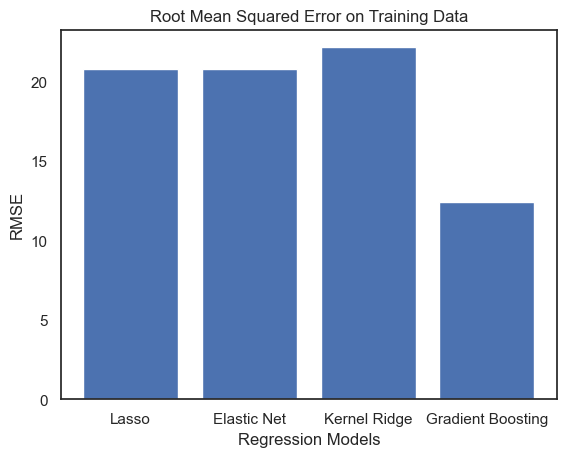

In [44]:
# Plot the results
models = ['Lasso', 'Elastic Net', 'Kernel Ridge', 'Gradient Boosting']
plt.bar(models, rmse)
plt.title('Root Mean Squared Error on Training Data')
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.show()

In [45]:
# Make predictions on the testing dataset
y_pred = gbr.predict(X_test)

# Evaluate the performance of the model using MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 12.73
RMSE: 17.38


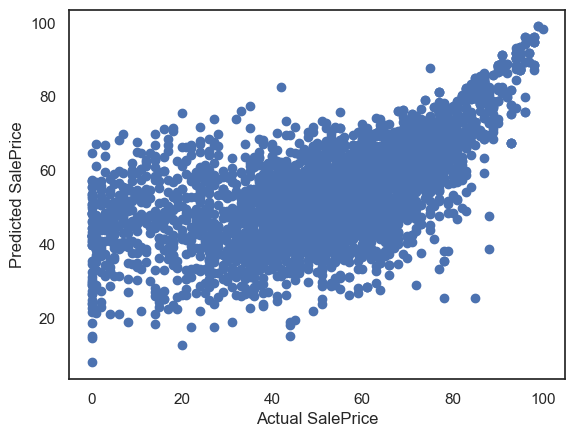

In [46]:
import matplotlib.pyplot as plt

# Plot actual vs predicted SalePrice
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

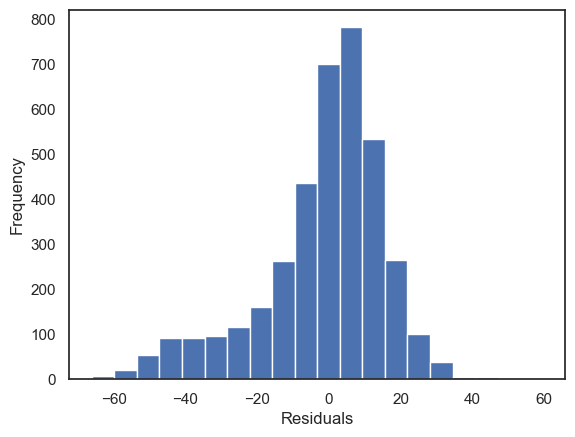

In [47]:
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()